In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [44]:
air = pd.read_csv("AirQualityUCI.csv", delimiter=";")
air.head()

,Date,Time,CO,PT08.S1,NMHC,C6H6,PT08.S2,NOx,PT08.S3,NO2,PT08.S4,PT08.S5,T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [45]:
air = air.drop(["Date","Time","CO","PT08.S1","C6H6","PT08.S2","AH","T","PT08.S5","PT08.S4","NO2","PT08.S3","NOx"], axis = 1)
# air = air.drop(["Date","Time","PT08.S1","C6H6","PT08.S2","AH","T","PT08.S5","PT08.S4","PT08.S3","NOx"], axis = 1)
air

,NMHC,RH
0,150,48.9
1,112,47.7
2,88,54.0
3,80,60.0
4,51,59.6
...,...,...
9352,-200,29.3
9353,-200,23.7
9354,-200,18.3
9355,-200,13.5


In [46]:
air.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NMHC    9357 non-null   int64  
 1   RH      9357 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 146.3 KB


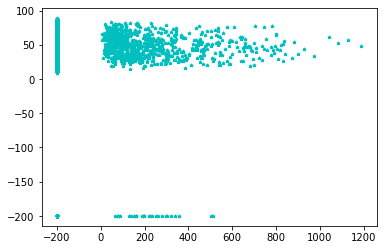

In [71]:
plt.scatter(air.NMHC , air.RH, s =10, c = "c", marker = "*", alpha = 1)
# plt.scatter(air.CO, air.NMHC , air.NO2, air.RH, marker = "o", alpha = 1)
plt.show()

In [48]:
air_x = air.iloc[:, 0:2]
# air_x = air.iloc[:, 0:4]
air_x.head()

,NMHC,RH
0,150,48.9
1,112,47.7
2,88,54.0
3,80,60.0
4,51,59.6


In [49]:
x_array = np.array(air_x)
print(x_array)

[[ 150.    48.9]
 [ 112.    47.7]
 [  88.    54. ]
 ...
 [-200.    18.3]
 [-200.    13.5]
 [-200.    13.1]]


In [50]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.25197984, 0.86214063],
       [0.22462203, 0.85798407],
       [0.20734341, 0.87980603],
       ...,
       [0.        , 0.75614825],
       [0.        , 0.739522  ],
       [0.        , 0.73813647]])

In [65]:
kmeans = KMeans(n_clusters = 5, random_state=42)

In [66]:
kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=42)

In [67]:
print(kmeans.cluster_centers_)

[[-1.17961196e-16  9.12226444e-01]
 [ 2.25995035e-02 -9.99200722e-16]
 [ 5.52722710e-01  8.50208892e-01]
 [-1.14491749e-16  8.11122325e-01]
 [ 2.37826059e-01  8.69200820e-01]]


In [68]:
air["kluster"] = kmeans.labels_

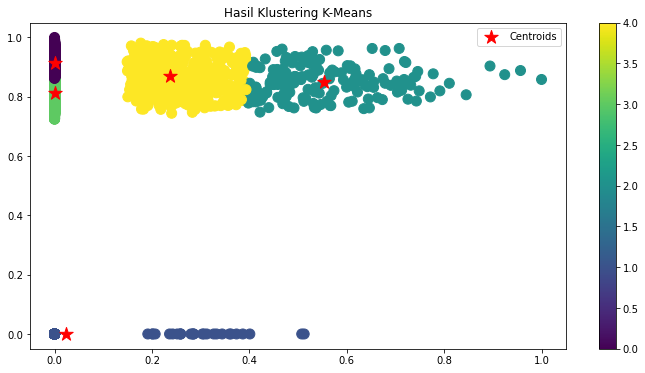

In [69]:
plt.figure(figsize=(12, 6))
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = air.kluster, marker = "o", alpha = 1, )
# output = plt.scatter(x_scaled[:,0], x_scaled[:,1], x_scaled[:,2], x_scaled[:,3],  marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="*", label='Centroids');
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.legend()
plt.show()